In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import warnings
warnings.filterwarnings('ignore')


In [5]:
DATABASE = "data/database.sqlite"
SQL_QUERY= "SELECT * FROM {}"
TABLE_LADESAUELE = "Ladesaulen"
TABLE_CARS = "car_registration"
connection = sqlite3.connect(DATABASE)
df_car = pd.read_sql_query(SQL_QUERY.format(TABLE_CARS),connection)
df_charger = pd.read_sql_query(SQL_QUERY.format(TABLE_LADESAUELE),connection)
GERMANY_GEO = {"type":"Feature","properties":{"name":"Germany"},"geometry":{"type":"Polygon","coordinates":[[[9.921906,54.983104],[9.93958,54.596642],[10.950112,54.363607],[10.939467,54.008693],[11.956252,54.196486],[12.51844,54.470371],[13.647467,54.075511],[14.119686,53.757029],[14.353315,53.248171],[14.074521,52.981263],[14.4376,52.62485],[14.685026,52.089947],[14.607098,51.745188],[15.016996,51.106674],[14.570718,51.002339],[14.307013,51.117268],[14.056228,50.926918],[13.338132,50.733234],[12.966837,50.484076],[12.240111,50.266338],[12.415191,49.969121],[12.521024,49.547415],[13.031329,49.307068],[13.595946,48.877172],[13.243357,48.416115],[12.884103,48.289146],[13.025851,47.637584],[12.932627,47.467646],[12.62076,47.672388],[12.141357,47.703083],[11.426414,47.523766],[10.544504,47.566399],[10.402084,47.302488],[9.896068,47.580197],[9.594226,47.525058],[8.522612,47.830828],[8.317301,47.61358],[7.466759,47.620582],[7.593676,48.333019],[8.099279,49.017784],[6.65823,49.201958],[6.18632,49.463803],[6.242751,49.902226],[6.043073,50.128052],[6.156658,50.803721],[5.988658,51.851616],[6.589397,51.852029],[6.84287,52.22844],[7.092053,53.144043],[6.90514,53.482162],[7.100425,53.693932],[7.936239,53.748296],[8.121706,53.527792],[8.800734,54.020786],[8.572118,54.395646],[8.526229,54.962744],[9.282049,54.830865],[9.921906,54.983104]]]},"id":"DEU"}


# The Impact of German Political Decisions on E-Mobility
Germany recognized e-mobility as an important technology for itself and its economy at an early stage. Policymakers have continued to roll out several action plans to promote e-mobility, but what impact have these plans had in reality?
this analysis shows the actual effects of the following German action plans on e-mobility:<br>
- 2009 National Electromobility Development Plan of the Federal Government



# Datasources
## Datasource: Liste of charging stations <br>
•	Metadata URL: /<br>
•	Data URL:<br> https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/E_Mobilitaet/Ladesaeulenregister_CSV.csv?__blob=publicationFile&v=46<br>
•	Data Type: CSV<br>
•	Licence: Lizenz CC BY 4.0 (bundesnetzagentur.de) This data source shows the exact coordinates of the charging stations, contains the charging points as well as their amperage and also indicates the commissioning of the station.
<br><br>
## Datasource: New registration of motor vehicles<br>
•	Metadata URL: /<br>
•	Data URL:<br> https://www.kba.de/DE/Statistik/Produktkatalog/produkte/Fahrzeuge/fz8/fz8_gentab.html;jsessionid=FAB7EB31182B3E967B07899A2BE2623E.live21322?nn=3547466<br>
•	Data Type: HTML / xlsxx (depending on the year)<br>
•	Licence: Datenlizenz Deutschland – Namensnennung – Version 2.0 (Kraftfahrt-Bundesamt, Flensburg) This data source shows the monthly registration of electric cars. Since the data is published mixed either via HTML or XLSX, a small scraper has to be built here to analyze the page and merge the needed data.


## 2009 National Electromobility Development Plan of the Federal Government

- Electric vehicles will only become established if the associated infrastructure is also built
- Electric drives (hybrid, battery and fuel cell vehicles) offer great potential for reducing dependence on petroleum as an energy source
- In the context of the national development plan, the term e-mobility is limited to road transport, especially passenger cars as well as two-wheelers
- German government is striving to achieve the ambitious goal of having million electric vehicles on Germany's roads by 2020. By 2030 there could be more than five million vehicles.


### The development of the market until 2020 in 3 phases

#### 2009 -2011

###### Infrastructure Goals:
<br>
First public Charging stations

###### Infrastructure Reality

Total amount of Charger Stations: 324


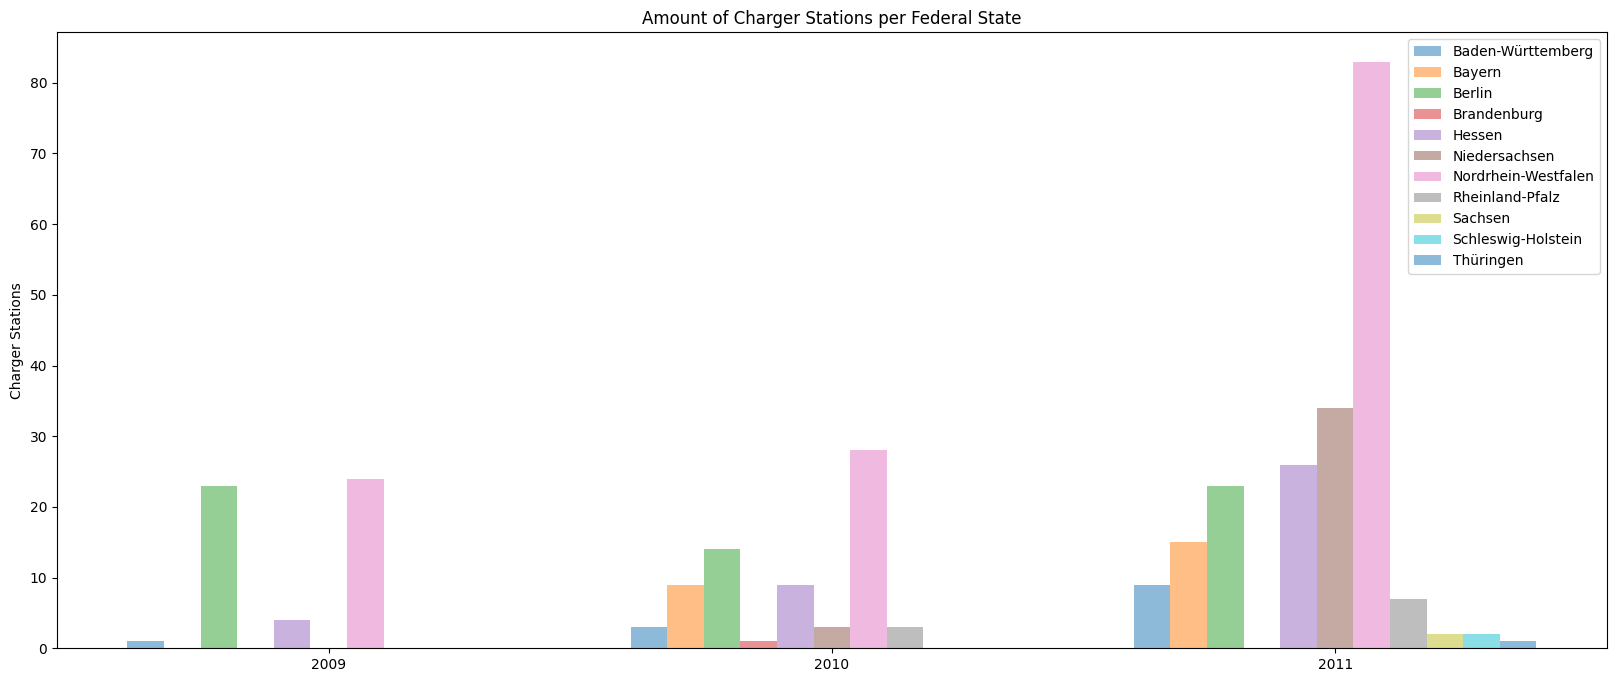

In [6]:
df_charger = pd.read_sql_query(SQL_QUERY.format(TABLE_LADESAUELE),connection)
df = df_charger
df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y')
# Filter rows where the date is between 2009 and 2011 (inclusive)
df = df[(df['Inbetriebnahmedatum'].dt.year >= 2009) & (df['Inbetriebnahmedatum'].dt.year <= 2011)]
print(f"Total amount of Charger Stations: {len(df)}")
plot_overview_diagram(df)

- <strong>2009: 52 </strong>
- <strong>2010: 70 </strong>
- <strong>2011: 202 </strong>


In [7]:
show_map(df)

###### Automotive Goals:
<br>
mostly FuE

###### Automotive Reality:


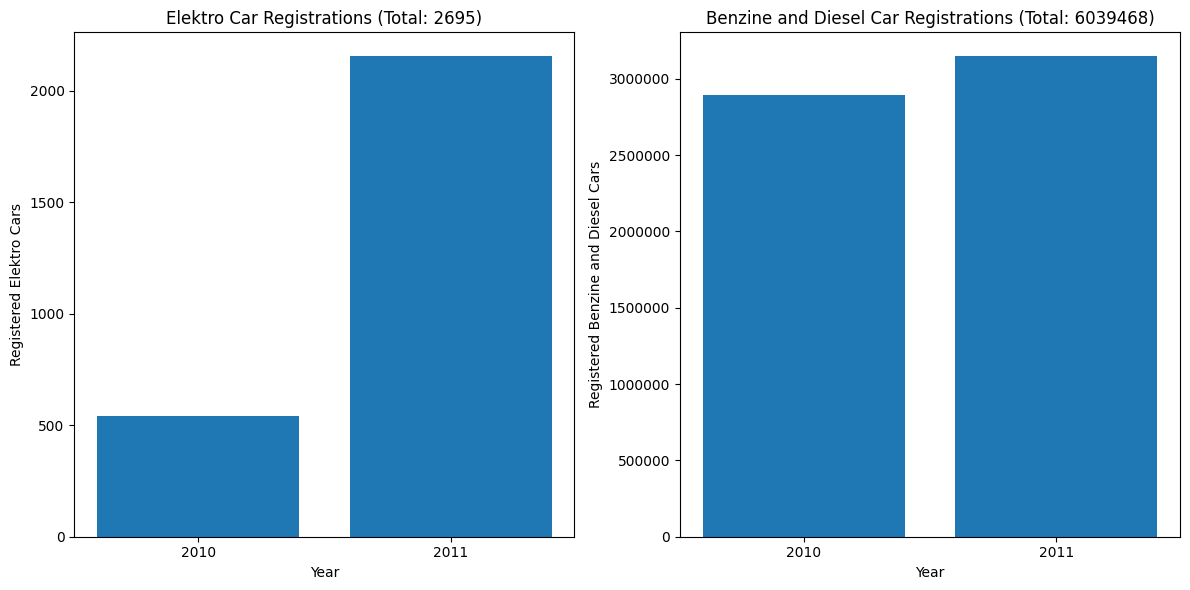

In [8]:
plot_cars([2010,2011])

#### 2011 - 2016

###### Infrastructure Goals:
<br>
Charging infrastructure in many cities and regions

###### Infrastructure Reality

Total amount of Charger Stations: 2505


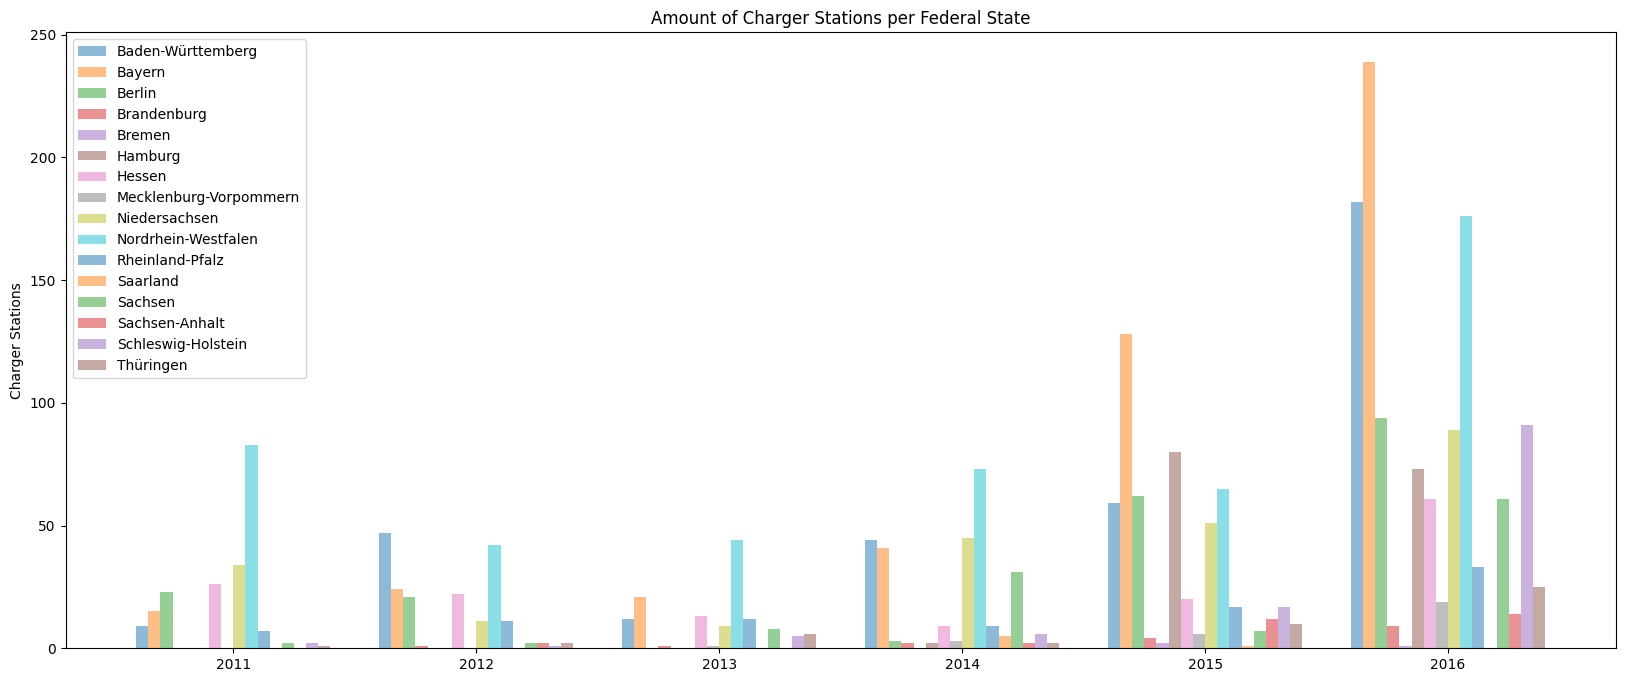

In [9]:
df_charger = pd.read_sql_query(SQL_QUERY.format(TABLE_LADESAUELE),connection)
df = df_charger
df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y')
df = df[(df['Inbetriebnahmedatum'].dt.year >= 2011) & (df['Inbetriebnahmedatum'].dt.year <= 2016)]
print(f"Total amount of Charger Stations: {len(df)}")
plot_overview_diagram(df)

- <strong> 2016:     1167</strong>
- <strong> 2015:      541</strong>
- <strong> 2014:      277</strong>
- <strong> 2013:      132</strong>
- <strong> 2012:      186</strong>
- <strong> 2011:      202</strong>


In [10]:
show_map(df)

###### Automotive Goals:
<br>
Small series of PHEVs and BEVs by all manufacturers

###### Automotive Reality:

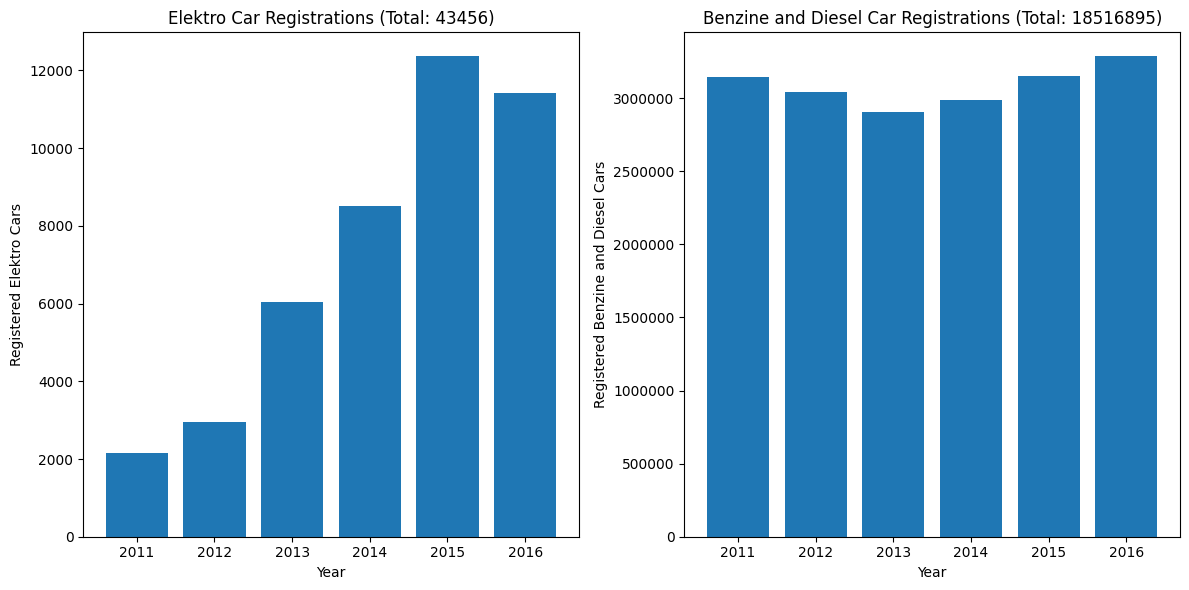

In [11]:
plot_cars([2011,2012,2013,2014,2015,2016])

#### 2017 - 2020

###### Infrastructure Goals:
<br>
Infrastructure: Nationwide charging infrastructure

###### Infrastructure Reality

Total amount of Charger Stations: 17845


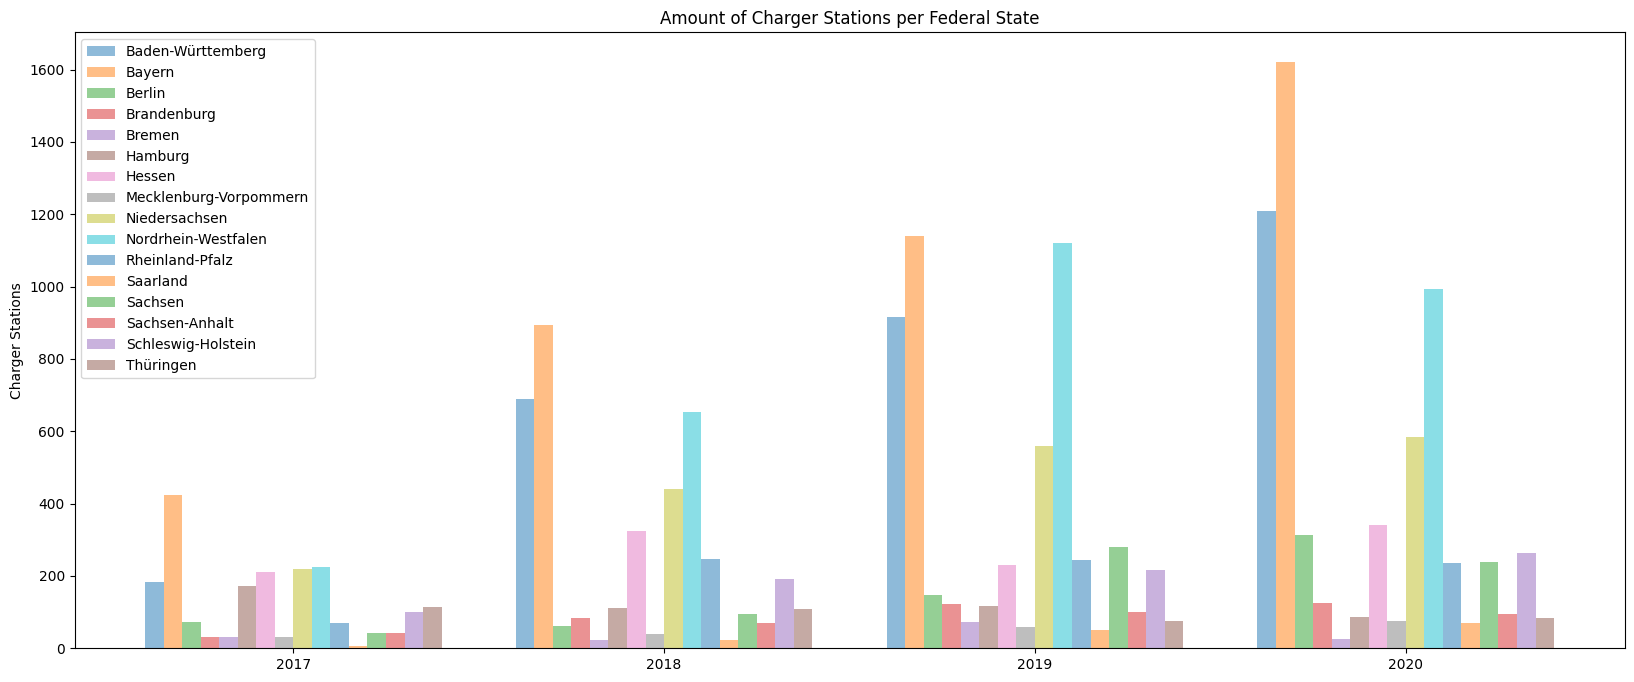

In [12]:
df_charger = pd.read_sql_query(SQL_QUERY.format(TABLE_LADESAUELE),connection)
df = df_charger
df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y')
df = df[(df['Inbetriebnahmedatum'].dt.year >= 2017) & (df['Inbetriebnahmedatum'].dt.year <= 2020)]
print(f"Total amount of Charger Stations: {len(df)}")

plot_overview_diagram(df)

- <strong>2020:    6362</strong>
- <strong>2019:     5449</strong>
- <strong>2018:     4055</strong>
- <strong>2017:     1979</strong>


In [ ]:
# Execute at own risk, too many icons!
#show_map(df)

###### Automotive Goals:
Automotive: Mass production of 2nd Generation PHEVs and BEVs by all manufacturers

###### Automotive Reality:

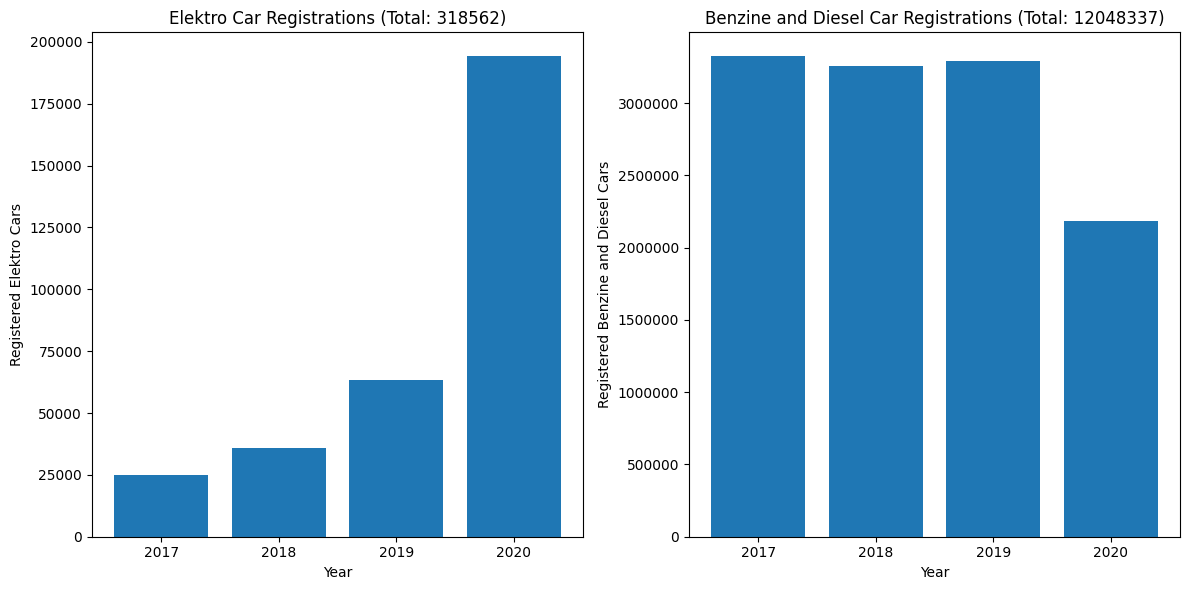

In [13]:
plot_cars([2017,2018,2019,2020])

### Summary National Electromobility Development Plan of the Federal Government
As the data show, it could be argued that the government successfully implemented the set targets in the first phase, but this was also due to the low targets set. This is understandable, however, as a lot of R&D needs to be done at this time to improve the overall technology in terms of vehicle and infrastructure.<br><br>
The second phase was characterized by the fact that the goal was to put the first large number of cars on the road by means of a small series of all car manufacturers. As can be seen from the figures, however, it is not possible to speak of a small series here when, in comparison, diesel and gasoline vehicles were registered over 18.5 million times in the same period. Nevertheless, the relatively high increase in 2015 is interesting; the reasoning here would be that this was perhaps due to the Electric Mobility Act, which was intended to make electric cars more attractive.
In 2016, there were 11,054 municipalities in Germany and only slightly more than 2,500 charging stations, which is why it can also be said that the infrastructure target of "charging stations in many cities and regions" was missed.<br><br>

In the last phase, which should also have been the volume market phase with mass production of 2nd generation PHEV and BEV, has also been rather modest. The federal government's target was 1 million electric cars, and in the last period just over a third of that number were registered, while over 12 million gasoline and diesel vehicles were still registered in the same period. 
In terms of infrastructure, however, there have been great leaps forward, as with over 17,000 officially registered charging stations and a total of 10795 municipalities, it can be said that there is a comprehensive charging infrastructure.

### Analysis Criticism: <br>
The analysis does not address hybrid cars, as they were/are never really more ecological. 
Likewise, not all framework programs launched by the government were discussed, but rather seen as an extension of the framework program concluded in 2009. 

### extensions:
- Comparing the development of Germany with other countries
- Bring in the origin of the manufacturer of the register electric cars
- compare the charging infrastructure with the network of filling stations
- Compare the charging infrastructure/number of electric cars with the amount of electricity generated.

### Execute Me first!

In [3]:
# temp df to not tamper with the actual dataframe


def plot_overview_diagram(df):
    df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y')
    df['Inbetriebnahmedatum'] = df['Inbetriebnahmedatum'].dt.year
    years = df["Inbetriebnahmedatum"].unique().tolist()
    years.sort()
    # [bundesland][year] =
    bundes_land_year = {}
    for index, row in df.iterrows():
        #
        date = row['Inbetriebnahmedatum']
        bundesland = row['Bundesland']
        if bundesland not in bundes_land_year:
            bundes_land_year[bundesland] = {}
        if date not in bundes_land_year[bundesland]:
            bundes_land_year[bundesland][date] = 0
        bundes_land_year[bundesland][date]+=1
    # fill missing years with 0
    for bundesland in bundes_land_year.keys():
        for year in years:
            if year not in bundes_land_year[bundesland].keys():
                bundes_land_year[bundesland][year] = 0

    # sort years and bundesland
    sorted_bundesland = list(bundes_land_year.keys())
    sorted_bundesland.sort()
    # dict 
    numbers = {}
    values = []
    for year in years:    
        for bundesland in sorted_bundesland:
            values.append(bundes_land_year[bundesland][year])
        numbers[year] = tuple(values)
        values = []



    labels = sorted_bundesland
    # Extract the years and corresponding values from the 'numbers' dictionary
    years = list(numbers.keys())
    values = list(numbers.values())

    # Determine the number of years and values
    num_years = len(years)
    num_values = len(labels)

    # Set the width of each bar
    bar_width = 0.8 / num_values  # Adjust the value to adjust the width of the bars

    # Set the positions of the bars on the x-axis
    x = np.arange(num_years)

    plt.figure(figsize=(20, 8))  # Set the figure width to 12 inches and height to 6 inches

    # Create the bar plot
    for i in range(num_values):
        plt.bar(x + i * bar_width, [value[i] for value in values], width=bar_width, align='center', alpha=0.5, label=labels[i])

    # Set the labels for the x-axis ticks
    plt.xticks(x + (num_values - 1) * bar_width / 2, years)

    # Set the labels for the y-axis and the title of the plot
    plt.ylabel('Charger Stations')
    plt.title('Amount of Charger Stations per Federal State')

    # Add a legend
    plt.legend()
    # Show the plot
    plt.show()

    
    

In [1]:
def show_map(df):
    map = folium.Map(location=[51.1657, 10.4515], zoom_start=6, tiles="cartodb positron")
    # Iterate over the DataFrame rows and add markers to the map
    for index, row in df.iterrows():
        latitude = row['Breitengrad']
        longitude = row['Längengrad']
        popup_text = f"""
        {row["Straße"]}\n
        {row["Inbetriebnahmedatum"]}\n
        Number of Charging Points: {row["Anzahl_Ladepunkte"]}\n    
        """    
        marker = folium.Marker(location=[latitude, longitude], popup=popup_text)
        marker.add_to(map)

    folium.GeoJson(GERMANY_GEO,
               name='germany').add_to(map)

    
    #map.save('charger_station_2009_to_2011.html')  
    return map
    


In [2]:
def plot_cars(years):
    df_car = pd.read_sql_query(SQL_QUERY.format(TABLE_CARS), connection)
    df = df_car.copy()
    
    for name in ["Elektro", "Diesel", "Benzin"]:
        df[name] = df[name].astype(str)
        df[name] = df[name].str.replace(".", "")  # cleaning
        df[name] = df[name].str.replace("-", "0")  # cleaning
        df[name] = pd.to_numeric(df[name], errors='coerce')

    grouped_elektro = df.groupby('Date')['Elektro'].sum()
    grouped_fuel = df.groupby('Date')['Benzin'].sum() + df.groupby('Date')['Diesel'].sum()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Plot the first bar plot for 'Elektro' registrations
    values_elektro = [grouped_elektro.get(year, 0) for year in years]
    axes[0].bar(years, values_elektro)
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Registered Elektro Cars")
    axes[0].set_title(f"Elektro Car Registrations (Total: {sum(values_elektro)})")
    axes[0].set_xticks(years)
    
    axes[0].ticklabel_format(axis='y', style='plain')
    
    # Plot the second bar plot for 'Benzin' and 'Diesel' registrations
    values_fuel = [grouped_fuel.get(year, 0) for year in years]
    
    axes[1].bar(years, values_fuel)
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Registered Benzine and Diesel Cars")
    axes[1].set_title(f"Benzine and Diesel Car Registrations (Total: {sum(values_fuel)})")
    axes[1].set_xticks(years)
    
    axes[1].ticklabel_format(axis='y', style='plain')
    
    plt.tight_layout()
    
    plt.show()
